In [ ]:
!pip install pystac_client -q
!pip install geopandas -q
!pip install rasterio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 99.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 69.8 MB/s eta 0:00:00


In [ ]:
import requests

source = requests.get("https://raw.githubusercontent.com/amanjainblr/pytest-cloud-native/master/bbox_bly.geojson").json()

In [ ]:
source

In [ ]:
import shapely.geometry

shapely_shapes = [shapely.geometry.shape(fea['geometry']) for fea in source['features']]
aoi_as_polygon = shapely.geometry.MultiPolygon(shapely_shapes)

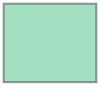

In [ ]:
aoi_as_polygon

In [ ]:
from pystac_client import Client

URL = 'https://earth-search.aws.element84.com/v0/'

client = Client.open(URL)

In [ ]:
search = client.search(
    max_items = 10,
    collections = "sentinel-s2-l2a-cogs",
    intersects = aoi_as_polygon,
    datetime = '2022-01-01/2022-01-24'
)

In [ ]:
print(f"AOI as Shapely Geometry object from MultiPolygon(), found {len(list(search.items()))} items")


AOI as Shapely Geometry object from MultiPolygon(), found 5 items


In [ ]:
# import stackstac

# ds = stackstac.stack(search.get_all_items(),  epsg=4326, assets=["B04", "B03", "B05"] )

# use rasterio instead

search.get_all_items()

id: S2A_43PFS_20220121_0_L2A
"bbox: [75.92753362677816, 14.376412445348974, 76.95454345329671, 15.37518123359286]"
created: 2022-01-21T12:22:59.064Z
sentinel:product_id: S2A_MSIL2A_20220121T052121_N0301_R062_T43PFS_20220121T071835
sentinel:sequence: 0
view:off_nadir: 0
sentinel:valid_cloud_cover: True
platform: sentinel-2a
sentinel:utm_zone: 43
proj:epsg: 32643
sentinel:grid_square: FS


In [ ]:
# https://github.com/stac-utils/pystac-client/blob/47b7f355c347c204dfdec03384385a1685509828/docs/tutorials/stac-metadata-viz.ipynb
from copy import deepcopy
import geopandas as gpd
import pandas as pd
from shapely.geometry import shape

# convert a list of STAC Items into a GeoDataFrame
def items_to_geodataframe(items):
    _items = []
    for i in items:
        _i = deepcopy(i)
        _i['geometry'] = shape(_i['geometry'])
        _items.append(_i)
    gdf = gpd.GeoDataFrame(pd.json_normalize(_items))
    for field in ['properties.datetime', 'properties.created', 'properties.updated']:
        if field in gdf:
            gdf[field] = pd.to_datetime(gdf[field])
    gdf.set_index('properties.datetime', inplace=True)
    return gdf

In [ ]:
gdf = items_to_geodataframe(search.items_as_dicts())
gdf

,stac_version,bbox,properties.sentinel:boa_offset_applied,geometry,links,id,collection,type,stac_extensions,assets.overview.proj:shape,...,properties.sentinel:utm_zone,properties.proj:epsg,properties.sentinel:grid_square,properties.instruments,properties.constellation,properties.eo:cloud_cover,properties.gsd,properties.sentinel:latitude_band,properties.sentinel:data_coverage,properties.updated
properties.datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-21 05:34:49+00:00,1.0.0-beta.2,"[75.92753362677816, 14.376412445348974, 76.954...",False,"POLYGON ((76.94563 14.37641, 75.92753 14.38259...","[{'rel': 'self', 'href': 'https://earth-search...",S2A_43PFS_20220121_0_L2A,sentinel-s2-l2a-cogs,Feature,"[eo, view, proj]","[343, 343]",...,43,32643,FS,[msi],sentinel-2,0.00,10,P,100,2022-01-21 12:22:59.064000+00:00
2022-01-16 05:34:44+00:00,1.0.0-beta.2,"[75.92753362677816, 14.376412445348974, 76.954...",NaN,"POLYGON ((76.94563 14.37641, 75.92753 14.38259...","[{'rel': 'self', 'href': 'https://earth-search...",S2B_43PFS_20220116_0_L2A,sentinel-s2-l2a-cogs,Feature,"[eo, view, proj]","[343, 343]",...,43,32643,FS,[msi],sentinel-2,38.66,10,P,100,2022-01-16 11:28:10.249000+00:00
2022-01-11 05:34:50+00:00,1.0.0-beta.2,"[75.92753362677816, 14.376412445348974, 76.954...",NaN,"POLYGON ((76.94563 14.37641, 75.92753 14.38259...","[{'rel': 'self', 'href': 'https://earth-search...",S2A_43PFS_20220111_0_L2A,sentinel-s2-l2a-cogs,Feature,"[eo, view, proj]","[343, 343]",...,43,32643,FS,[msi],sentinel-2,0.19,10,P,100,2022-01-11 12:11:52.573000+00:00
2022-01-06 05:34:45+00:00,1.0.0-beta.2,"[75.92753362677816, 14.376412445348974, 76.954...",NaN,"POLYGON ((76.94563 14.37641, 75.92753 14.38259...","[{'rel': 'self', 'href': 'https://earth-search...",S2B_43PFS_20220106_0_L2A,sentinel-s2-l2a-cogs,Feature,"[eo, view, proj]","[343, 343]",...,43,32643,FS,[msi],sentinel-2,0.05,10,P,100,2022-01-06 09:59:08.607000+00:00
2022-01-01 05:34:50+00:00,1.0.0-beta.2,"[75.92753362677816, 14.376412445348974, 76.954...",NaN,"POLYGON ((76.94563 14.37641, 75.92753 14.38259...","[{'rel': 'self', 'href': 'https://earth-search...",S2A_43PFS_20220101_0_L2A,sentinel-s2-l2a-cogs,Feature,"[eo, view, proj]","[343, 343]",...,43,32643,FS,[msi],sentinel-2,73.91,10,P,100,2022-01-01 11:43:47.141000+00:00


In [ ]:
#ndvi
asset = gdf[gdf.id == 'S2A_43PFS_20220121_0_L2A']
b08 = asset['assets.B08.href'].values[0]
b04 = asset['assets.B04.href'].values[0]

In [ ]:
b08

In [ ]:
import rasterio as rio
with rio.open(b08) as b8, rio.open(b04) as b4:
  ndvi = (b8.read() - b4.read())/ (b8.read() +b4.read() )


<ipython-input-15-0281350d8123>:3: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (b8.read() - b4.read())/ (b8.read() +b4.read() )


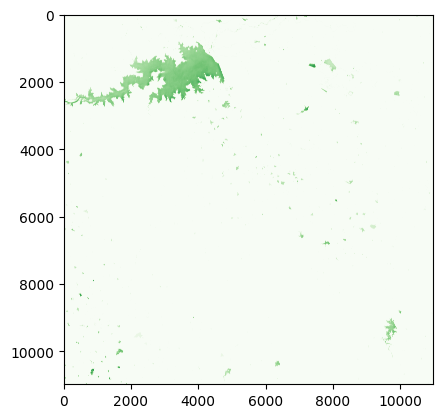

<Axes: >

In [ ]:
from rasterio.plot import show
show(ndvi, cmap='Greens')